# **Problem #1**

*   Apply only **logistic regression** for the **NumtaDB** dataset and build a multiclass classification model that can recognize `[0-9]` Bengali handwritten digits with different hyperparameter settings.  

**Logistic regression** in machine learning is a type of algorithm which uses logistic function. It is named for this function used at the core of the method. The main goal of logistic regression is to **minimize the error between its predictions and training data**.

 It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1 or -1 and 1, but never exactly at those limits. The following code shows the shape of the function within the range -5 to 5.

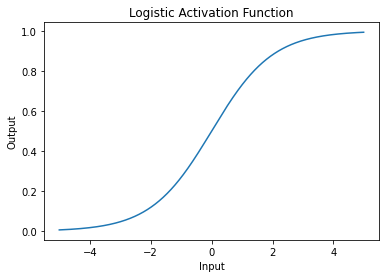

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)
plt.title('Logistic Activation Function')
plt.xlabel('Input')
plt.ylabel('Output');

The dataset we'll be using is the  **NumtaDB: Bengali Handwritten Digits** dataset, a dataset of 28x28 black and white images consisting of handwritten Bengali digits, 0 to 9. It contains 5 training samples with different types of black and white images. 
<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1YIyqdg82RnrQM5pfKidLtWHdpOiGJ3nN" width="500">
</div>

**Dataset Link:** https://www.kaggle.com/BengaliAI/numta/







**Data Processing**

Let's start by importing all of the modules we'll need. The main ones we need to import are:
- torch for general PyTorch functionality
- torch.nn and torch.nn.functional for neural network based functions
- torch vision is a part of PyTorch which consists of popular datasets,model, architectures and frequently used for image transformation.
- torchvision.transforms for data augmentation.
- torchvision.datasets for loading the dataset
- torch.optim for our optimizer which will update the parameters of our neural network
- torch.utils.data and torch.utils.data.sampler for handling the dataset  
- matplotlib for plotting
- PIL is python imaging library used to handle images.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Loading and Procesing NumtaDB Dataset


**Importing Dataset From Kaggle**

This dataset is available in kaggle, which helps us to train and use the dataset faster.

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marufakamallabonno","key":"296735e68c21a45a5f703c68a3815e76"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # changing permission

In [5]:
!kaggle datasets download -d BengaliAI/numta

100% 1.91G/1.91G [00:17<00:00, 37.9MB/s]
100% 1.91G/1.91G [00:17<00:00, 115MB/s] 


The Zip file is downloaded in the root folder which is now unzipped to extract the files in it.

In [6]:
from zipfile import ZipFile
f_name= 'numta.zip'
with ZipFile(f_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
import os
from os import path
TRAIN_PATH = 'trainImage'
os.mkdir(TRAIN_PATH)

Now that the datas are imported in the root folder, how should the dataset be arranged in a better way?

All the images are now kept in a single folder `.trainImage`. in order to access all the images easier

In [8]:


def processImages(folder_name):
  src = folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)  

In [9]:
import shutil
processImages('training-a')
print('A Done')
processImages('training-b')
print('B Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')
processImages('training-e')
print('E Done')

A Done
B Done
C Done
D Done
E Done


In [10]:
os.listdir('/content/trainImage')

['e09600.png',
 'd00002.png',
 'c16353.png',
 'c16995.png',
 'c10572.png',
 'a19538.png',
 'e11784.png',
 'e16057.png',
 'e08363.png',
 'c09000.png',
 'a18880.png',
 'c19525.png',
 'e12629.png',
 'e14708.png',
 'e03277.png',
 'e02614.png',
 'a03249.png',
 'a17684.png',
 'c03692.png',
 'a19190.png',
 'c07453.png',
 'e03692.png',
 'c14092.png',
 'a16684.png',
 'c14590.png',
 'd10464.png',
 'a17657.png',
 'e13559.png',
 'd10530.png',
 'a10327.png',
 'c05985.png',
 'c07198.png',
 'c10942.png',
 'a12932.png',
 'c13122.png',
 'e08540.png',
 'c12679.png',
 'a13641.png',
 'a16577.png',
 'a08831.png',
 'a07111.png',
 'c23994.png',
 'a07325.png',
 'd01375.png',
 'a17120.png',
 'd07581.png',
 'a04131.png',
 'c22480.png',
 'c10247.png',
 'd00593.png',
 'c07272.png',
 'c09771.png',
 'c17433.png',
 'e00903.png',
 'c22040.png',
 'e01805.png',
 'c10891.png',
 'c17082.png',
 'c07735.png',
 'e16400.png',
 'c13898.png',
 'c23909.png',
 'c13430.png',
 'a07270.png',
 'e08011.png',
 'a02198.png',
 'a18040.p

Using the **pandas** library the csv files are imported.
Only the necessary columns are kept dropping the remaining columns.

In [11]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [12]:
import pandas as pd
a_csv = showRawTrainingSamples('training-a.csv')
b_csv = showRawTrainingSamples('training-b.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')
e_csv = showRawTrainingSamples('training-e.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-b.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')
training-e.csv
Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')


In [13]:
def truncateColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

Only the **filename** and the **digit** column is kept.

In [14]:
a_csv = truncateColumns(a_csv)
b_csv = truncateColumns(b_csv)
c_csv = truncateColumns(c_csv)
d_csv = truncateColumns(d_csv)
e_csv = truncateColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
       filename  digit
0    b00000.png      0
1    b00001.png      2
2    b00002.png      5
3    b00003.png      2
4    b00004.png      5
..          ...    ...
354  b00354.png      5
355  b00355.png      9
356  b00356.png      2
357  b00357.png      1
358  b00358.png      2

[359 rows x 2 columns]
     filename  digit
0  b00000.png      0
1  b00001.png      2
2  b00002.png      5
3  b00003.png      2
4  b00004.png      5
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png     

All the csv files are now merged together in order to prepare a single csv file.

In [15]:
total_csv = [a_csv,b_csv,c_csv,d_csv,e_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

72045


### Preparing the Training Dataset

A dataset class is made in order to create the training dataset which contains both the images and the label of the imags collected from the csv files.

In [16]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

Next, we want to normalize our data. Normalizing our data allows a models to train faster. It also helps to avoid local minima, i.e. train more reliably and distributes the data for training easily.



Normalize does the following for each channel:

$ {image}= \frac{image- mean}{std}$
The parameters `mean` and `std`(standard deviation/variance) are passed as 0.5, 0.5 in this case. This will normalize the image pixels in the range [-1,1]. For example, the minimum value 0 will be converted to $ \frac{(0-0.5)}{0.5}= {-1} $, the maximum value of 1 will be converted to $\frac{(1-0.5)}{0.5}= {1} $.



From `torchvision.transform` we use `transforms.Compose` to built a list of transformations that will be applied to the image. We will manipulate and process the given training data.

The transforms we use are:
- `Resize()` - Resize the input image to the given size into the shape 28 $ \times $ 28
- `ToTensor()` - this converts the image from a PIL image into a PyTorch tensor.
- `Normalize` - this subtracts the mean and divides by the standard deviations given. 
 `Normalize` should only be applied to the images after they have been converted into a tensor. The Torchvision's documentation makes it much easier to understand why [transforms should be applied to PIL images](https://pytorch.org/docs/stable/torchvision/transforms.html#transforms-on-pil-image) and [transforms why should be applied on tensors](https://pytorch.org/docs/stable/torchvision/transforms.html#transforms-on-torch-tensor).

Two list of transforms are made: 

*   **`train_transform`**
*   **`test_transform`** 



In [17]:
mean = [0.5,]
std = [0.5, ]
TRAIN_PATH = 'trainImage'
train_transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize(mean,std) 
])

test_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
])

train_dataset  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_dataset = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples merged together : ",len(train_dataset))

Trainig Samples merged together :  72045


In [ ]:
 print(type(train_dataset))
print("Trainig Samples: ",train_dataset[0])

__main__.Dataset
Trainig Samples:  (tensor([[[ 0.6392,  0.6392,  0.6392,  0.6392,  0.6471,  0.6392,  0.6392,
           0.6471,  0.6392,  0.6392,  0.6471,  0.6392,  0.6314,  0.6314,
           0.6392,  0.6314,  0.6235,  0.6314,  0.6392,  0.6314,  0.6314,
           0.6314,  0.6392,  0.6392,  0.6471,  0.6471,  0.6471,  0.6471],
         [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,
           0.6471,  0.6471,  0.6471,  0.6392,  0.6392,  0.6392,  0.6392,
           0.6314,  0.6314,  0.6314,  0.6314,  0.6392,  0.6392,  0.6471,
           0.6471,  0.6392,  0.6392,  0.6392,  0.6392,  0.6392,  0.6471],
         [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6549,  0.6549,
           0.6471,  0.6549,  0.6471,  0.6392,  0.6471,  0.6471,  0.6392,
           0.6392,  0.6392,  0.6314,  0.6314,  0.6392,  0.6392,  0.6392,
           0.6392,  0.6392,  0.6392,  0.6392,  0.6314,  0.6471,  0.6471],
         [ 0.6471,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,
           0

Now we can see the size and shape of the training dataset. 

Here, 1 shows the dimension for the color chanel and the images are reshaped to 28 $ \times $ 28 pixel size( 28 pixels height and width image converted into a 784 element vector)

In [ ]:
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])

torch.Size([1, 28, 28])
(1, 28, 28)
5


Label:
0


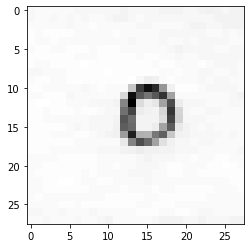

In [ ]:
## Displaying a NumtaDB Image
# Label
print("Label:")
print(train_dataset[7][1])

show_img = train_dataset[7][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

Using the **matplotlib** python package 25 images of the training dataset are displayed.



In [ ]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap = 'bone')
        ax.axis('off')

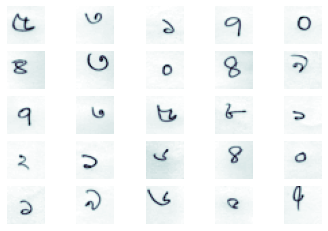

In [ ]:
N_IMAGES =25

images = [image for image, label in [train_dataset[i] for i in range(N_IMAGES)]] 

plot_images(images)

### **Settings 1**
- **totaldata:** 72,045
- **minibatch:** 32
- **iterations:**11,500
- **learning_rate:** 0.005
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 11500 \div \frac{72045}{32} = 5.21 \approx 5$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 32
num_iters =11500
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.005
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Now for testing purpose the training data is split into 90:10 ratio. The testing set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

It is always better to **shuffle the indices of the training set** .We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. 

`DataLoader`  is defined for each of the training/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:

#batch size
batch_size = 32

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:2027
Test dataloader:226


#### Step #1 : Design model using class

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

####Step #2 : Construct loss and optimizer (select from PyTorch API)

We need Cross Entropy Loss to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes softmax **([Logistic or Sigmoid]/softmax function)**
2. Computes Cross Entropy Loss

Softmax function is used as the activation function in this case as it is a multiclass problem. When we’re building a classifier for problems with only one right answer, we apply a softmax to the raw outputs. Applying a softmax takes into account all of the elements of the raw output, in the denominator, which means that the different probabilities produced by the softmax function are interrelated whereas, in sigmoid function all the probabilities are independant of each other. The probabilities produced by a softmax will always sum to one as they are interrelated. The following image shows the equation for softmax function:
<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1SHujI3ZkJm_QmGQal-Y2Lk49J_ScquPz" width="400">
</div>



Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).



In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

####Step #3 : Training: forward, loss, backward, step

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

5
Iteration: 500. Loss: 2.0256643295288086. Accuracy: 27.359800111049417
Iteration: 1000. Loss: 1.8136411905288696. Accuracy: 25.249861188228763
Iteration: 1500. Loss: 2.0873706340789795. Accuracy: 26.52692948362021
Iteration: 2000. Loss: 1.8248628377914429. Accuracy: 26.09661299278179
Iteration: 2500. Loss: 2.034414291381836. Accuracy: 29.664075513603553
Iteration: 3000. Loss: 1.884207844734192. Accuracy: 33.02332037756802
Iteration: 3500. Loss: 1.4988830089569092. Accuracy: 29.997223764575235
Iteration: 4000. Loss: 1.8825104236602783. Accuracy: 32.16268739589117
Iteration: 4500. Loss: 1.7080291509628296. Accuracy: 31.066074403109383
Iteration: 5000. Loss: 1.8613030910491943. Accuracy: 32.52359800111049
Iteration: 5500. Loss: 1.8651059865951538. Accuracy: 35.53581343697945
Iteration: 6000. Loss: 2.155517816543579. Accuracy: 36.535258189894506
Iteration: 6500. Loss: 1.8539800643920898. Accuracy: 33.66185452526374
Iteration: 7000. Loss: 1.7294033765792847. Accuracy: 30.219322598556356
I

Optimization process that requires a loss function to calculate the model error. Here, cross entropy is used as loss function. The following graph shows the variation of the loss with each 500th iteration.

[2.0256643295288086, 1.8136411905288696, 2.0873706340789795, 1.8248628377914429, 2.034414291381836, 1.884207844734192, 1.4988830089569092, 1.8825104236602783, 1.7080291509628296, 1.8613030910491943, 1.8651059865951538, 2.155517816543579, 1.8539800643920898, 1.7294033765792847, 1.8238426446914673, 1.730789303779602, 1.791598916053772, 2.0472729206085205, 1.7552303075790405, 1.7928993701934814]


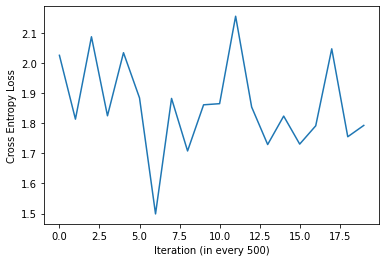

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/MyDrive/4.2/sc/'

Mounted at /content/gdrive


In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'numta_logistic40.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'numta_logistic40.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


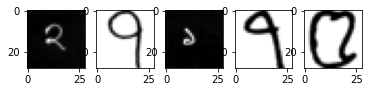

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [8 7 8 7 5]


- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 7500
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:


# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:649
Test dataloader:73


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

10
Iteration: 500. Loss: 2.180241346359253. Accuracy: 17.545807884508605
Iteration: 1000. Loss: 2.1594414710998535. Accuracy: 22.903942254303164
Iteration: 1500. Loss: 2.046835422515869. Accuracy: 24.98611882287618
Iteration: 2000. Loss: 2.143098831176758. Accuracy: 25.541365907828983
Iteration: 2500. Loss: 2.061190128326416. Accuracy: 28.317601332593004
Iteration: 3000. Loss: 1.9808404445648193. Accuracy: 27.165463631315937
Iteration: 3500. Loss: 1.9384853839874268. Accuracy: 28.442531926707385
Iteration: 4000. Loss: 1.9416344165802002. Accuracy: 28.525818989450304
Iteration: 4500. Loss: 1.92525053024292. Accuracy: 29.886174347584674
Iteration: 5000. Loss: 2.013770818710327. Accuracy: 28.90061077179345
Iteration: 5500. Loss: 1.8732954263687134. Accuracy: 30.649639089394782
Iteration: 6000. Loss: 1.9163655042648315. Accuracy: 29.955580233203776


In [ ]:
print(iter) 

9126


[2.051849842071533, 1.7751795053482056, 1.80410897731781, 2.1537725925445557, 2.0596230030059814, 1.7474687099456787, 2.0605030059814453, 1.8692857027053833, 1.952172040939331, 2.123460054397583, 1.6264073848724365, 1.7823539972305298, 1.8158222436904907, 2.001878499984741, 1.97365140914917, 1.7517189979553223, 1.835985541343689, 1.8582990169525146, 1.758105754852295, 1.6249759197235107, 2.038346767425537, 1.7610889673233032, 1.5551254749298096, 1.9908251762390137, 1.9787728786468506, 1.9021100997924805, 1.7032825946807861, 1.6774924993515015]


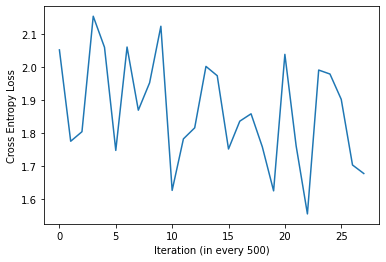

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()



### **Settings 2**
- **totaldata:** 72,045
- **minibatch:** 64
- **iterations:**8,000
- **learning rate**: 0.005
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 8000 \div \frac{72045}{64} = 7.11 \approx 7$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 64
num_iters =8000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.005
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:

#batch size
batch_size = 64

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:1014
Test dataloader:113


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

7
Iteration: 500. Loss: 2.0847039222717285. Accuracy: 25.31926707384786
Iteration: 1000. Loss: 1.9120080471038818. Accuracy: 28.053858967240423
Iteration: 1500. Loss: 1.8714364767074585. Accuracy: 26.762909494725154
Iteration: 2000. Loss: 1.774006962776184. Accuracy: 29.677956690727374
Iteration: 2500. Loss: 1.8657307624816895. Accuracy: 30.46918378678512
Iteration: 3000. Loss: 1.8036737442016602. Accuracy: 35.42476401998889
Iteration: 3500. Loss: 1.8587982654571533. Accuracy: 35.81343697945586
Iteration: 4000. Loss: 1.939481496810913. Accuracy: 32.91227096057746
Iteration: 4500. Loss: 1.9163141250610352. Accuracy: 34.230982787340366
Iteration: 5000. Loss: 1.9284337759017944. Accuracy: 30.55247084952804
Iteration: 5500. Loss: 2.0095982551574707. Accuracy: 36.22987229317046
Iteration: 6000. Loss: 1.8967044353485107. Accuracy: 34.13381454747363
Iteration: 6500. Loss: 1.8689604997634888. Accuracy: 36.14658523042754
Iteration: 7000. Loss: 1.6527791023254395. Accuracy: 37.40977234869517


[2.0256643295288086, 1.8136411905288696, 2.0873706340789795, 1.8248628377914429, 2.034414291381836, 1.884207844734192, 1.4988830089569092, 1.8825104236602783, 1.7080291509628296, 1.8613030910491943, 1.8651059865951538, 2.155517816543579, 1.8539800643920898, 1.7294033765792847, 1.8238426446914673, 1.730789303779602, 1.791598916053772, 2.0472729206085205, 1.7552303075790405, 1.7928993701934814]


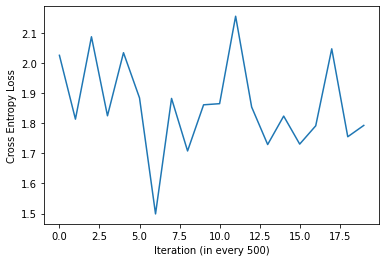

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'numta_logistic37.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'numta_logistic37.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


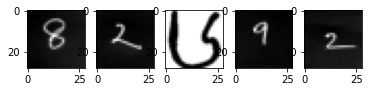

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()



### **Settings 3**
- **totaldata:** 72,045
- **minibatch:** 100
- **iterations:**7,500
- **learning rate**:0.001
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 7500 \div \frac{72045}{100} = 10.41 \approx 7$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


In [41]:
# Hyperparameters

batch_size =100
num_iters =7500
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001

In [42]:

#batch size
batch_size = 100

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:649
Test dataloader:73


In [43]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [44]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [45]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [46]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

10
Iteration: 500. Loss: 2.2221107482910156. Accuracy: 20.030538589672403
Iteration: 1000. Loss: 2.131715774536133. Accuracy: 23.63964464186563
Iteration: 1500. Loss: 2.076960563659668. Accuracy: 25.541365907828983
Iteration: 2000. Loss: 2.1200902462005615. Accuracy: 26.52692948362021
Iteration: 2500. Loss: 2.01003360748291. Accuracy: 26.929483620210995
Iteration: 3000. Loss: 2.101806640625. Accuracy: 26.277068295391448
Iteration: 3500. Loss: 2.059678792953491. Accuracy: 28.400888395335926
Iteration: 4000. Loss: 1.9633430242538452. Accuracy: 30.108273181565796
Iteration: 4500. Loss: 2.0409610271453857. Accuracy: 29.761243753470293
Iteration: 5000. Loss: 1.9505518674850464. Accuracy: 29.38645197112715
Iteration: 5500. Loss: 1.9451745748519897. Accuracy: 31.135480288728484
Iteration: 6000. Loss: 1.9494465589523315. Accuracy: 29.886174347584674


[2.2221107482910156, 2.131715774536133, 2.076960563659668, 2.1200902462005615, 2.01003360748291, 2.101806640625, 2.059678792953491, 1.9633430242538452, 2.0409610271453857, 1.9505518674850464, 1.9451745748519897, 1.9494465589523315]


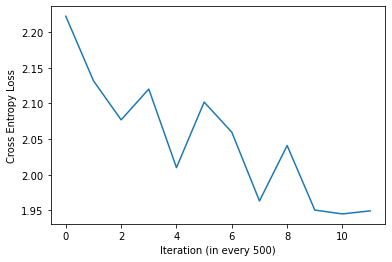

In [47]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [48]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'numta_logistic31.pkl') 

In [49]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'numta_logistic31.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


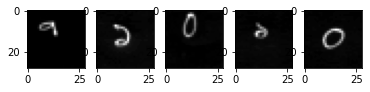

In [50]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [52]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [4 1 8 4 0]



### Settings 4
- **totaldata:** 72, 045
- **minibatch:** 128
- **iterations:** 6,000
- **learning rate**: 0.002
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 6000 \div \frac{72045}{128} =10.41\approx 10$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 128
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.002
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:

#batch size
batch_size = 128

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:507
Test dataloader:57


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

10
Iteration: 500. Loss: 2.1461260318756104. Accuracy: 22.903942254303164
Iteration: 1000. Loss: 2.005657434463501. Accuracy: 24.639089394780676
Iteration: 1500. Loss: 2.045494318008423. Accuracy: 27.012770682953914
Iteration: 2000. Loss: 2.0088741779327393. Accuracy: 27.77623542476402
Iteration: 2500. Loss: 2.0357444286346436. Accuracy: 28.400888395335926
Iteration: 3000. Loss: 1.9676835536956787. Accuracy: 28.178789561354805
Iteration: 3500. Loss: 2.0330820083618164. Accuracy: 30.83009439200444
Iteration: 4000. Loss: 1.8157070875167847. Accuracy: 31.593559133814548
Iteration: 4500. Loss: 1.8639787435531616. Accuracy: 33.23153803442532
Iteration: 5000. Loss: 1.9355225563049316. Accuracy: 33.24541921154914


In [ ]:
print(iter)

5070


[2.1461260318756104, 2.005657434463501, 2.045494318008423, 2.0088741779327393, 2.0357444286346436, 1.9676835536956787, 2.0330820083618164, 1.8157070875167847, 1.8639787435531616, 1.9355225563049316]


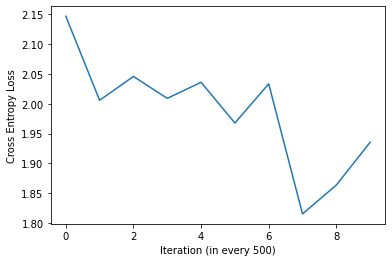

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()


### Settings 5
- **totaldata:** 72, 045
- **minibatch:** 128
- **iterations:** 6,000
- **learning rate**: 0.01
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 6000 \div \frac{72045}{128} =10.41\approx 10$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [53]:
# Hyperparameters

batch_size = 128
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.01
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [54]:

#batch size
batch_size = 128

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:507
Test dataloader:57


In [55]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [56]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [57]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [58]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

10
Iteration: 500. Loss: 1.984052062034607. Accuracy: 26.124375347029428
Iteration: 1000. Loss: 1.9413270950317383. Accuracy: 30.60799555802332
Iteration: 1500. Loss: 1.8513402938842773. Accuracy: 30.88561910049972
Iteration: 2000. Loss: 1.7977619171142578. Accuracy: 36.937812326485286
Iteration: 2500. Loss: 1.7069408893585205. Accuracy: 33.717379233759026
Iteration: 3000. Loss: 1.8631842136383057. Accuracy: 36.86840644086619
Iteration: 3500. Loss: 1.8307148218154907. Accuracy: 37.15991116046641
Iteration: 4000. Loss: 1.8425114154815674. Accuracy: 36.74347584675181
Iteration: 4500. Loss: 1.8674074411392212. Accuracy: 37.04886174347585
Iteration: 5000. Loss: 1.6867579221725464. Accuracy: 39.97779011660189


[1.984052062034607, 1.9413270950317383, 1.8513402938842773, 1.7977619171142578, 1.7069408893585205, 1.8631842136383057, 1.8307148218154907, 1.8425114154815674, 1.8674074411392212, 1.6867579221725464]


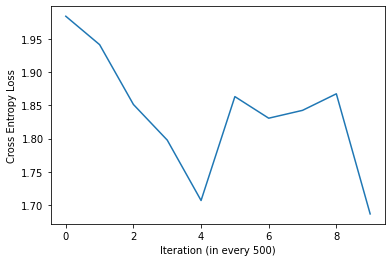

In [59]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [60]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'numta_logistic128_39.pkl') 

In [61]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'numta_logistic128_39.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


### **Result Analysis**

The hyperparameters are varied and tried out for different possibilities to get the best result. The following comparisions are seen while testing the dataset.

1. **Batch size**: A hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
2. **Epoch**: A hyperparameter that controls the number of complete passes through the training dataset. 
1. **Learning rate**: The amount with which the weights are updated to help the gradient descent converge.
1. **Iteration:** The number of batches needed to complete one epoch.
2. **Accuracy:** An evaluation metric used to predict the correctness of a machine learning model.





|   Mini-Batch Size   | Iterations   | Learning Rate| Accuracy     |Num of Epochs    |
| :-------------:| :----------: | :-----------:|:-----------:|:-----------:|
|      32        | 11500         | 0.005       |**40.63%**      |5            |
| 64             | 8000         | 0.005        |37.40%       |7            |
|100              |7500          | 0.001        |31.13%       |10            |
|128             |6000        | 0.002        |33.24%       |10           |
|128             |6000         |0.01          |39.97%       |10           |

Here, we can see that in the first case for a smaller minibatch and higher iteration with lr=0.005 we get the best accuracy 40.63%.

For batch size 128 for 2 different **learning rates** and comparitively lower iteration the results vary about (33.24-39.97)$\approx 6$. So, changes in lr can bring a good impact on the performance of a model. 

It can be said that there is no fixed rule to configure the parameters. Different values should be tried out to get the best result for the problem.